## Training Decision Tree

A Decision Tree (árvore de decisão) é um algoritmo de aprendizado supervisionado usado para tarefas de classificação e regressão. O modelo organiza decisões em uma estrutura hierárquica de nós: os nós internos representam testes em atributos, os ramos representam os resultados desses testes, e os nós folha correspondem às previsões finais. A árvore é construída dividindo recursivamente o conjunto de dados em subconjuntos mais homogêneos, com base em métricas como Gini, Entropia ou Variância, dependendo do tipo de tarefa. As árvores de decisão são capazes de capturar relações não lineares entre as variáveis, porém são suscetíveis a overfitting, especialmente quando muito profundas.

<table>
        <thead>
            <tr>
                <th rowspan="2">Modelo</th>
                <th rowspan="2">Acurácia</th>
                <th colspan="3">Precisão</th>
                <th colspan="3">Recall</th>
                <th colspan="3">F1-Score</th>
            </tr>
            <tr>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
                <th>Classe 0</th>
                <th>Classe 1</th>
                <th>Classe 2</th>
            </tr>
        </thead>
        <tbody>
            <tr>
                <td>DT - All</td>
                <td>98%</td>
                <td>1.00</td>
                <td>0.91</td>
                <td>0.88</td>
                <td>0.98</td>
                <td>1.00</td>
                <td>1.00</td>
                <td>0.99</td>
                <td>0.95</td>
                <td>0.93</td>
            </tr>
            <tr>
                <td>DT - Selected</td>
                <td>98%</td>
                <td>1.00</td>
                <td>0.91</td>
                <td>0.88</td>
                <td>0.98</td>
                <td>1.00</td>
                <td>1.00</td>
                <td>0.99</td>
                <td>0.95</td>
                <td>0.93</td>
            </tr>
</table>

### Setup

In [64]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

In [65]:
output_dir = '../images'
os.makedirs(output_dir, exist_ok=True)

In [66]:
def save_plot(fig, filename):
    file_path = os.path.join(output_dir, filename)
    fig.savefig(file_path, bbox_inches='tight')
    print(f'Imagem salva como {file_path}')

### Recovering the data

In [67]:
import pandas as pd

In [68]:
ML_ROOT_DIR = "../../ml-models"
FOLDER_ID = "dataset"
LDD_PATH = os.path.join(ML_ROOT_DIR, FOLDER_ID)

In [69]:
train_data = pd.read_csv(os.path.join(LDD_PATH, 'ldd_train_resampled.csv'))

In [70]:
train_data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,0,60,5.0,70,8.1,8.6,3.5,1.8,5.3,1.6,29.0,0
1,1,55,2.6,48,11.8,5.1,1.2,1.0,3.6,0.5,33.0,0
2,1,51,10.4,76,7.3,3.3,2.0,1.0,1.2,0.9,33.0,0
3,0,77,5.0,106,5.4,3.9,2.1,1.2,4.2,1.1,24.0,2
4,1,54,6.8,73,7.5,5.1,2.0,1.3,1.4,1.5,39.0,0


In [71]:
test_data = pd.read_csv(os.path.join(LDD_PATH, 'ldd_test.csv'))

In [72]:
test_data.head()

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI,CLASS
0,1,52,5.3,56,8.8,5.3,2.5,1.1,2.3,1.1,29.0,0
1,0,60,3.0,42,6.2,5.8,0.9,1.0,4.4,0.4,27.0,0
2,1,52,3.0,60,7.0,3.8,3.2,0.8,1.7,1.4,33.0,0
3,1,45,4.3,71,7.2,5.6,2.0,1.1,3.0,1.0,19.0,0
4,0,30,3.0,42,4.1,4.9,1.3,1.2,3.2,0.5,22.0,2


In [73]:
X_train = train_data.drop(columns=['CLASS'])
y_train = train_data['CLASS']

In [74]:
X_test = test_data.drop(columns=['CLASS'])
y_test = test_data['CLASS']

### Training with all features

In [75]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [76]:
model = DecisionTreeClassifier(random_state=42) 
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [77]:
y_pred = model.predict(X_test)

In [78]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

Acurácia: 0.9900


In [79]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       169
           1       0.91      1.00      0.95        10
           2       0.95      1.00      0.98        21

    accuracy                           0.99       200
   macro avg       0.95      1.00      0.97       200
weighted avg       0.99      0.99      0.99       200



In [80]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[167   1   1]
 [  0  10   0]
 [  0   0  21]]


In [81]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

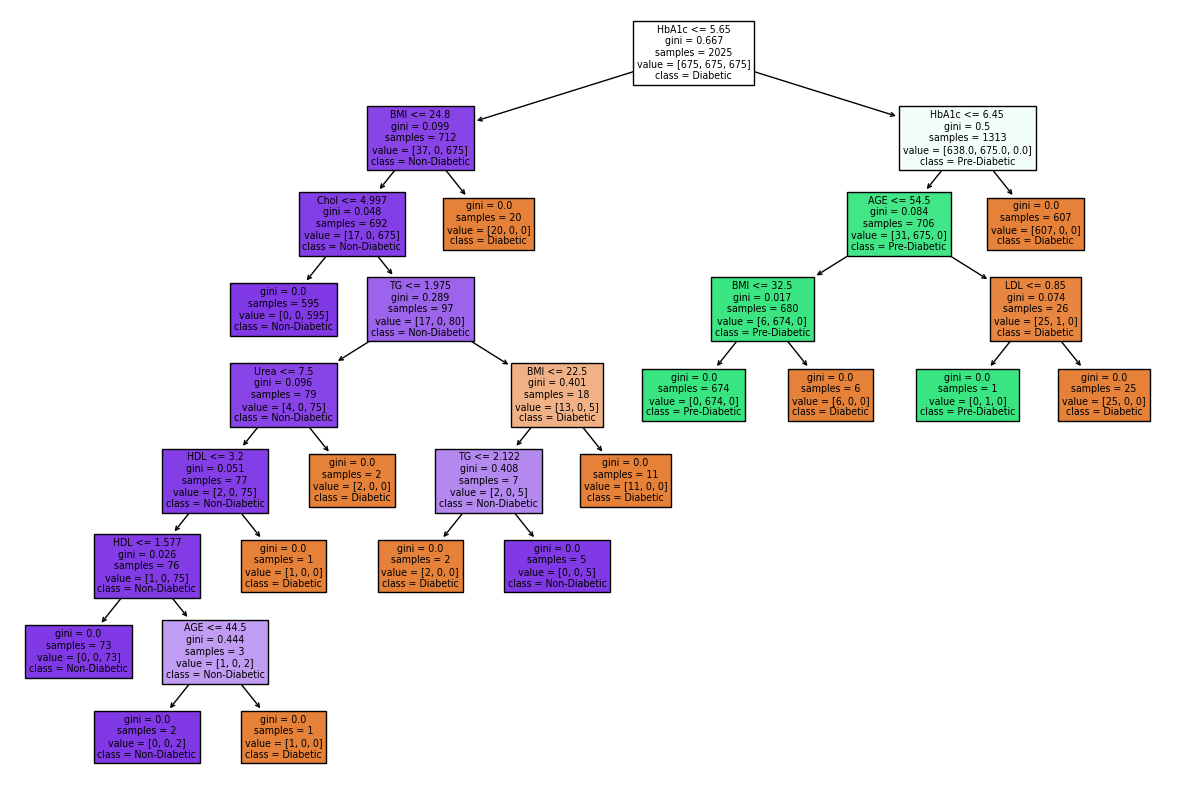

In [82]:
plt.figure(figsize=(15,10))
plot_tree(model, filled=True, feature_names=X_train.columns, 
          class_names=['Diabetic', 'Pre-Diabetic', 'Non-Diabetic'])
plt.show()

In [83]:
param_grid = {
  'max_depth': [3, 5, 10, None],  
  'min_samples_split': [2, 5, 10],  
  'min_samples_leaf': [1, 2, 5],  
  'criterion': ['gini', 'entropy']  
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [84]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [85]:
best_params_model = grid_search.best_estimator_

In [86]:
y_pred_best = best_params_model.predict(X_test)
print(f"Acurácia do modelo otimizado: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

Acurácia do modelo otimizado: 0.9800
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       169
           1       0.91      1.00      0.95        10
           2       0.88      1.00      0.93        21

    accuracy                           0.98       200
   macro avg       0.93      0.99      0.96       200
weighted avg       0.98      0.98      0.98       200



In [87]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred_best))

Matriz de Confusão:
[[165   1   3]
 [  0  10   0]
 [  0   0  21]]


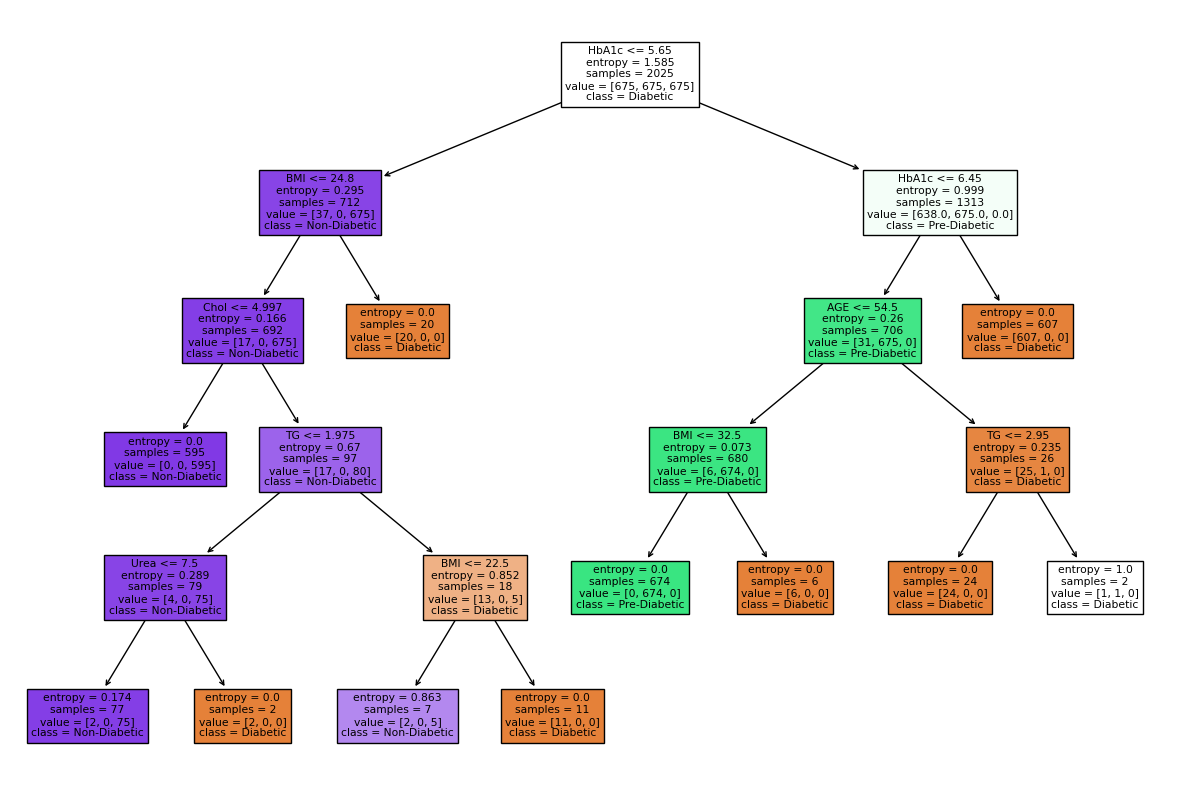

In [88]:
plt.figure(figsize=(15,10))
plot_tree(best_params_model, filled=True, feature_names=X_train.columns, 
          class_names=['Diabetic', 'Pre-Diabetic', 'Non-Diabetic'])
plt.show()

In [89]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

In [90]:
train_sizes, train_scores, val_scores = learning_curve(
  best_params_model, X_train, y_train, cv=5, scoring='accuracy', 
  train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

In [91]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

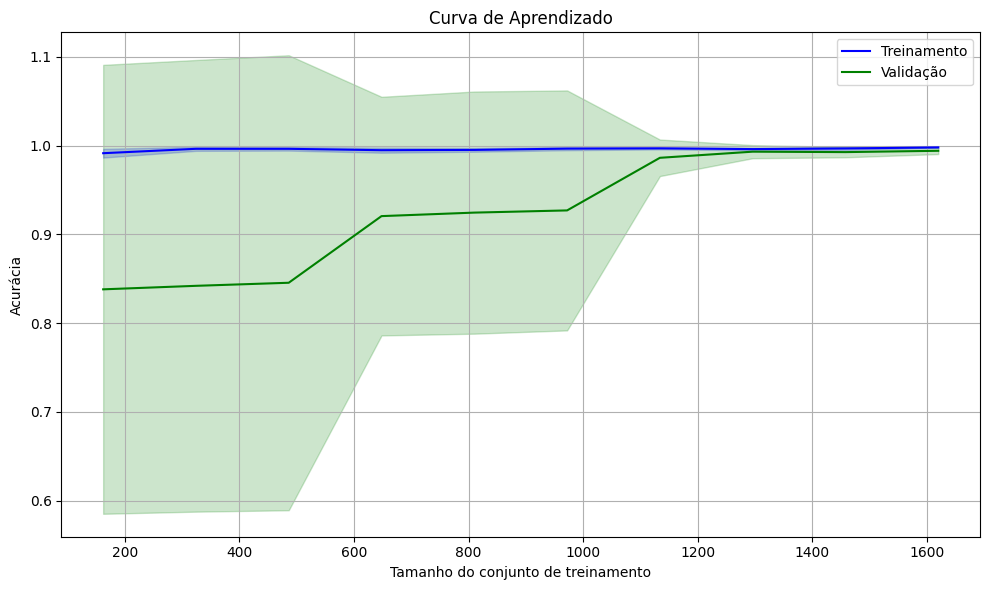

In [92]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Treinamento", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validação", color="green")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="green")

plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do conjunto de treinamento")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [93]:
import joblib
joblib.dump(best_params_model, '../models/decision_tree_model.joblib')

['../models/decision_tree_model.joblib']

#### Applying cross-validation

In [94]:
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.metrics import make_scorer, precision_score, recall_score, f1_score, accuracy_score

In [95]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'f1': make_scorer(f1_score, average='macro')
}

In [96]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [97]:
scores = cross_validate(best_params_model, X_train, y_train, cv=skf, scoring=scoring)

In [98]:
print('Acurácia:', scores['test_accuracy'])
print('Precisão:', scores['test_precision'])
print('Recall:', scores['test_recall'])
print('F1-Score:', scores['test_f1'])

Acurácia: [1.         0.99507389 1.         0.99014778 0.99014778 0.98514851
 0.97524752 0.9950495  0.9950495  0.9950495 ]
Precisão: [1.         0.99509804 1.         0.99033816 0.99019608 0.98591549
 0.9754902  0.99509804 0.99516908 0.99516908]
Recall: [1.         0.99509804 1.         0.99019608 0.99019608 0.98507463
 0.97527071 0.99509804 0.99502488 0.99502488]
F1-Score: [1.         0.99506173 1.         0.99012291 0.99015977 0.98517217
 0.97534413 0.99506173 0.99506064 0.99506064]


In [99]:
print(f'\nMédia de Acurácia: {scores["test_accuracy"].mean():.4f} ± {scores["test_accuracy"].std():.4f}')
print(f'Média de Precisão: {scores["test_precision"].mean():.4f} ± {scores["test_precision"].std():.4f}')
print(f'Média de Recall: {scores["test_recall"].mean():.4f} ± {scores["test_recall"].std():.4f}')
print(f'Média de F1-Score: {scores["test_f1"].mean():.4f} ± {scores["test_f1"].std():.4f}')


Média de Acurácia: 0.9921 ± 0.0071
Média de Precisão: 0.9922 ± 0.0069
Média de Recall: 0.9921 ± 0.0071
Média de F1-Score: 0.9921 ± 0.0070


### Training with the best features

In [100]:
from sklearn.feature_selection import SelectKBest, f_classif

In [101]:
k_values = range(1, X_train.shape[1] + 1)
accuracy_scores = []
selected_features_dict = {}

for k in k_values:
    selector = SelectKBest(score_func=f_classif, k=k)
    X_train_selected = selector.fit_transform(X_train, y_train)
    X_test_selected = selector.transform(X_test)

    model = DecisionTreeClassifier()
    model.fit(X_train_selected, y_train)
    y_pred = model.predict(X_test_selected)

    acc = accuracy_score(y_test, y_pred)
    accuracy_scores.append(acc)

    selected_features_indices = np.where(selector.get_support())[0]

    if hasattr(X_train, 'columns'):
        selected_features_dict[k] = X_train.columns[selected_features_indices].tolist()
    else:
        selected_features_dict[k] = selected_features_indices.tolist()

In [102]:
best_k = k_values[accuracy_scores.index(max(accuracy_scores))]
print(f"Melhor número de características: {best_k}")

Melhor número de características: 11


In [103]:
selector_best = SelectKBest(score_func=f_classif, k=best_k)
X_train_selected = selector_best.fit_transform(X_train, y_train)
X_test_selected = selector_best.transform(X_test)

In [104]:
print("Características selecionadas para o melhor k:")
print(selected_features_dict[best_k])

Características selecionadas para o melhor k:
['Gender', 'AGE', 'Urea', 'Cr', 'HbA1c', 'Chol', 'TG', 'HDL', 'LDL', 'VLDL', 'BMI']


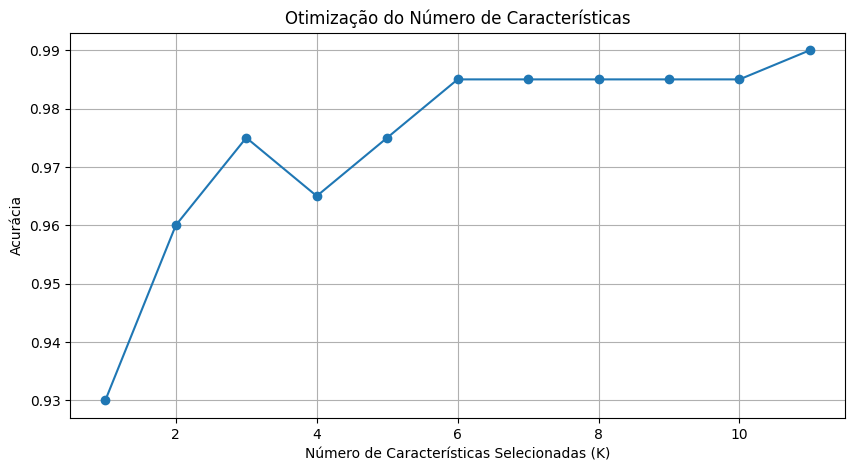

In [105]:
plt.figure(figsize=(10, 5))
plt.plot(k_values, accuracy_scores, marker='o', linestyle='-')
plt.xlabel('Número de Características Selecionadas (K)')
plt.ylabel('Acurácia')
plt.title('Otimização do Número de Características')
plt.grid()
plt.show()

In [106]:
model_k = DecisionTreeClassifier(random_state=42)
model_k.fit(X_train_selected, y_train)

DecisionTreeClassifier(random_state=42)

In [107]:
y_pred = model_k.predict(X_test_selected)

In [108]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia: {accuracy:.4f}")

Acurácia: 0.9900


In [109]:
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       169
           1       0.91      1.00      0.95        10
           2       0.95      1.00      0.98        21

    accuracy                           0.99       200
   macro avg       0.95      1.00      0.97       200
weighted avg       0.99      0.99      0.99       200



In [110]:
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Matriz de Confusão:
[[167   1   1]
 [  0  10   0]
 [  0   0  21]]


In [111]:
param_grid = {
  'max_depth': [3, 5, 10, None],  
  'min_samples_split': [2, 5, 10],  
  'min_samples_leaf': [1, 2, 5],  
  'criterion': ['gini', 'entropy']  
}

grid_search = GridSearchCV(estimator=model_k, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_leaf': [1, 2, 5],
                         'min_samples_split': [2, 5, 10]},
             verbose=2)

In [112]:
print("Melhores parâmetros encontrados:")
print(grid_search.best_params_)

Melhores parâmetros encontrados:
{'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [113]:
best_model_k = grid_search.best_estimator_

In [114]:
y_pred_best = best_model_k.predict(X_test_selected)
print(f"Acurácia do modelo otimizado: {accuracy_score(y_test, y_pred_best):.4f}")
print(classification_report(y_test, y_pred_best))

Acurácia do modelo otimizado: 0.9800
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       169
           1       0.91      1.00      0.95        10
           2       0.88      1.00      0.93        21

    accuracy                           0.98       200
   macro avg       0.93      0.99      0.96       200
weighted avg       0.98      0.98      0.98       200



In [115]:
import seaborn as sns
from matplotlib import pyplot as plt
cm = confusion_matrix(y_test, y_pred_best)

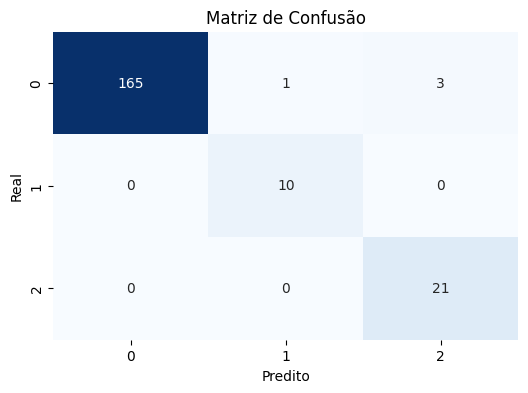

In [116]:
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão')
plt.show()

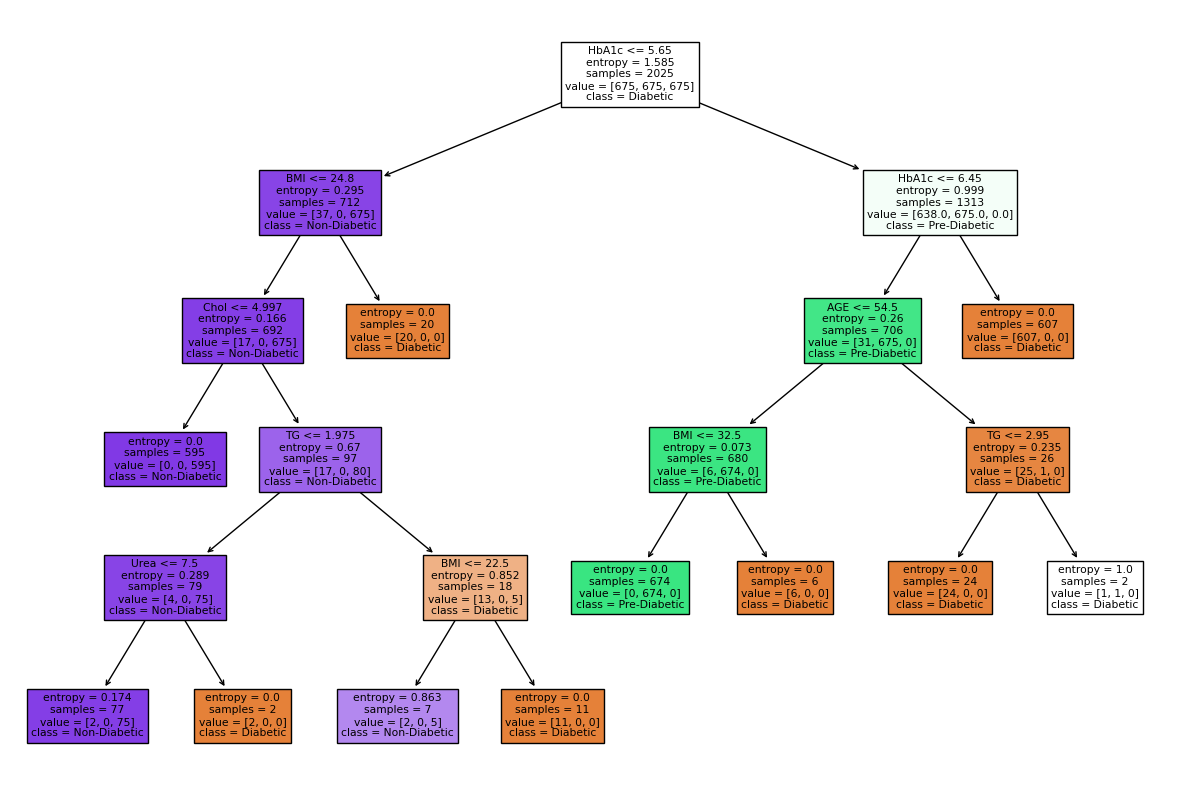

In [117]:
plt.figure(figsize=(15,10))
plot_tree(best_model_k, filled=True, feature_names=X_train.columns, 
          class_names=['Diabetic', 'Pre-Diabetic', 'Non-Diabetic'])
plt.show()

In [118]:
train_sizes, train_scores, val_scores = learning_curve(
  best_model_k, X_train_selected, y_train, cv=5, scoring='accuracy', 
  train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
)

In [119]:
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

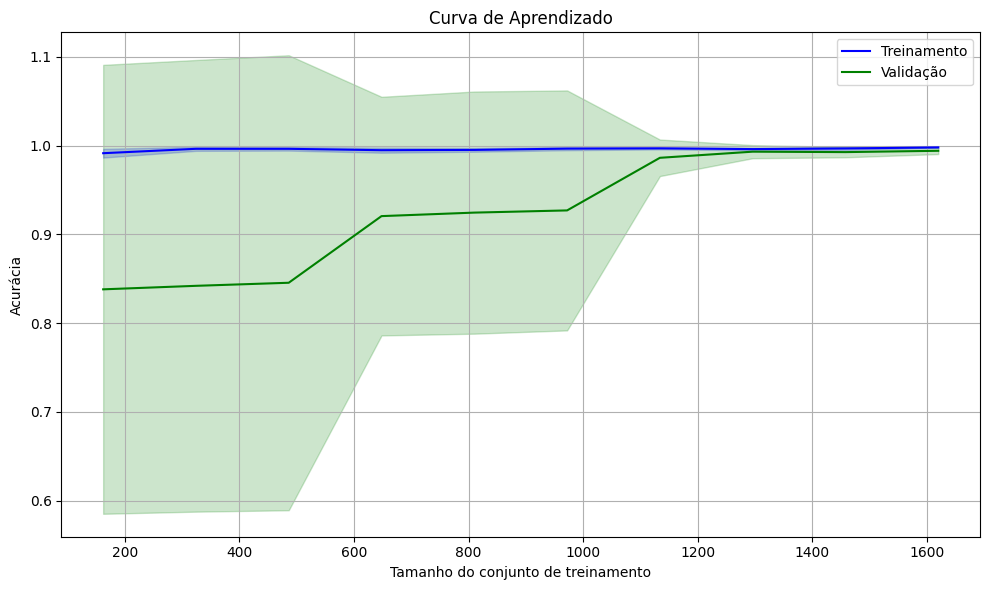

In [120]:
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label="Treinamento", color="blue")
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.2, color="blue")

plt.plot(train_sizes, val_mean, label="Validação", color="green")
plt.fill_between(train_sizes, val_mean - val_std, val_mean + val_std, alpha=0.2, color="green")

plt.title("Curva de Aprendizado")
plt.xlabel("Tamanho do conjunto de treinamento")
plt.ylabel("Acurácia")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [121]:
joblib.dump(best_model_k, '../models/decision_tree_KBest_model.joblib')

['../models/decision_tree_KBest_model.joblib']

#### Applying cross-validation

In [122]:
scoring = {
    'accuracy': 'accuracy',
    'precision': make_scorer(precision_score, average='macro'),
    'recall': make_scorer(recall_score, average='macro'), 
    'f1': make_scorer(f1_score, average='macro')
}

In [123]:
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [124]:
scores = cross_validate(best_model_k, X_train_selected, y_train, cv=skf, scoring=scoring)

In [125]:
print('Acurácia:', scores['test_accuracy'])
print('Precisão:', scores['test_precision'])
print('Recall:', scores['test_recall'])
print('F1-Score:', scores['test_f1'])

Acurácia: [1.         0.99507389 1.         0.99014778 0.99014778 0.98514851
 0.97524752 0.9950495  0.9950495  0.9950495 ]
Precisão: [1.         0.99509804 1.         0.99033816 0.99019608 0.98591549
 0.9754902  0.99509804 0.99516908 0.99516908]
Recall: [1.         0.99509804 1.         0.99019608 0.99019608 0.98507463
 0.97527071 0.99509804 0.99502488 0.99502488]
F1-Score: [1.         0.99506173 1.         0.99012291 0.99015977 0.98517217
 0.97534413 0.99506173 0.99506064 0.99506064]


In [126]:
print(f'\nMédia de Acurácia: {scores["test_accuracy"].mean():.4f} ± {scores["test_accuracy"].std():.4f}')
print(f'Média de Precisão: {scores["test_precision"].mean():.4f} ± {scores["test_precision"].std():.4f}')
print(f'Média de Recall: {scores["test_recall"].mean():.4f} ± {scores["test_recall"].std():.4f}')
print(f'Média de F1-Score: {scores["test_f1"].mean():.4f} ± {scores["test_f1"].std():.4f}')


Média de Acurácia: 0.9921 ± 0.0071
Média de Precisão: 0.9922 ± 0.0069
Média de Recall: 0.9921 ± 0.0071
Média de F1-Score: 0.9921 ± 0.0070
